# Atividade - Interpolação

## Caio Vítor de S. Soares
## 08/04/2021 

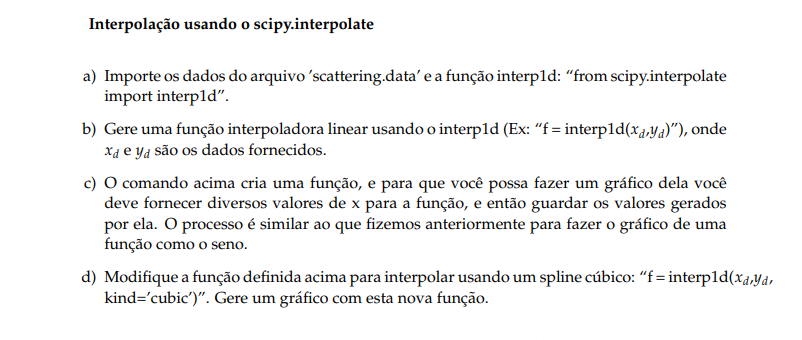

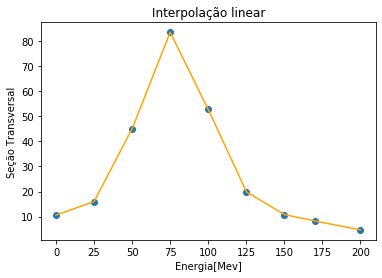

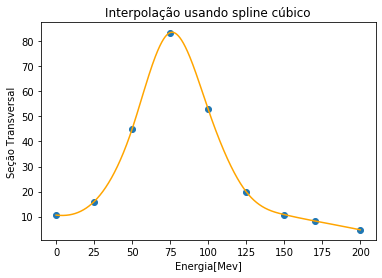

In [74]:
from numpy import loadtxt, arange
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
MD = loadtxt("scattering.data",float)
XD = MD[:,0]
YD = MD[:,1]

f1 = interp1d(XD,YD)
l = len(XD)
x = arange(XD[0],XD[l-1],0.1)
y = f(x)
plt.title("Interpolação linear")
plt.scatter(XD,YD)
plt.plot(x,y,color='orange')
plt.ylabel("Seção Transversal")
plt.xlabel("Energia[Mev]")
plt.show()

f2 = interp1d(XD,YD,kind = "cubic")
y2 = f2(x)
plt.title("Interpolação usando spline cúbico")
plt.scatter(XD,YD)
plt.plot(x,y2,color='orange')
plt.ylabel("Seção Transversal")
plt.xlabel("Energia[Mev]")
plt.show()


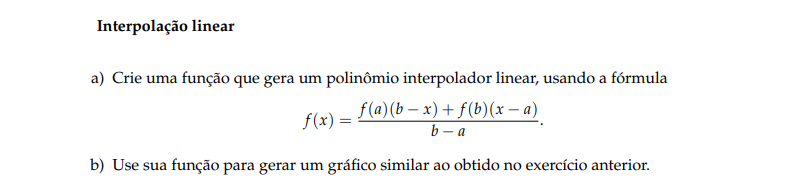

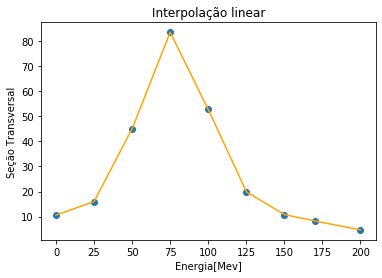

In [75]:
i = 0
YY = []
for i in range(0,l-1):
    for px in arange(XD[i],XD[i+1],0.1):
        py = (YD[i]*(XD[i+1]-px) + YD[i+1]*(px-XD[i]))/(XD[i+1]-XD[i])
        YY.append(py)


y = f(x)
plt.title("Interpolação linear")
plt.scatter(XD,YD)
plt.plot(x,YY,color='orange')
plt.ylabel("Seção Transversal")
plt.xlabel("Energia[Mev]")
plt.show()
        


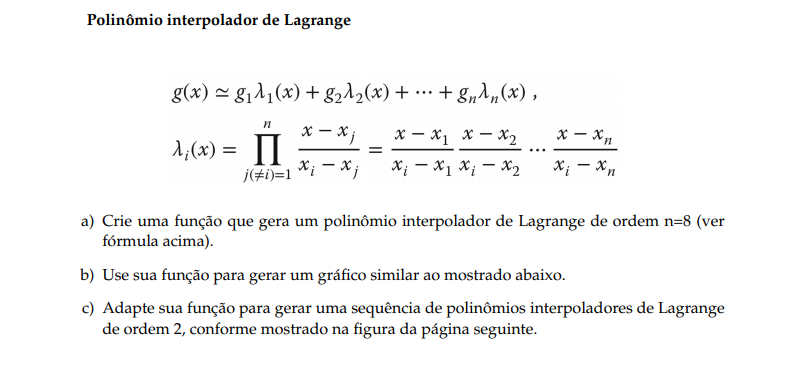

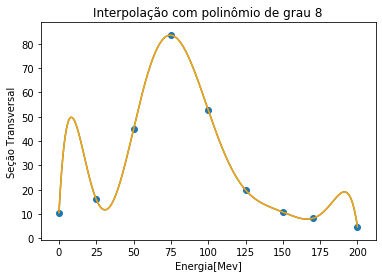

In [83]:
from numpy import array
G = YD
n = len(XD)
n-=1


def lambida(x,i,XD,n):
    P = 1
    for j in range(n+1):
        if j == i:
            pj = 1
        else:
            pj = (x - XD[j])/(XD[i] - XD[j])
        P = P*pj
    
    return P

def g(x):
    s = 0
    for i in range(n+1):
        s += lambida(x,i,XD,n)*G[i]
    return s

YYY = []
for x in arange (XD[0],XD[n],0.01):
    YYY.append(g(x))
x = arange(XD[0],XD[n],0.01)

plt.plot(x,YYY)

y = f(x)
plt.title("Interpolação com polinômio de grau 8")
plt.scatter(XD,G)
plt.plot(x,YYY,color='orange')
plt.ylabel("Seção Transversal")
plt.xlabel("Energia[Mev]")
plt.show()

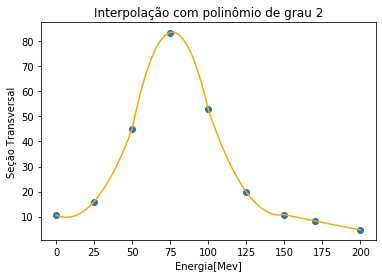

In [144]:
from numpy import array
G = YD
n = len(XD)
n = 2


def lambida(x,i,XD,n):
    P = 1
    for j in range(n+1):
        if j == i:
            pj = 1
        else:
            pj = (x - XD[j])/(XD[i] - XD[j])
        P = P*pj
    
    return P

def g(x,XDnovo,Gnovo):
    s = 0
    for i in range(n+1):
        s += lambida(x,i,XDnovo,n)*Gnovo[i]
    return s

YYY = []
YYYY = []
X = []

for i in range(0,8,n):
    XDnovo = XD[i:i+n+1]
    Gnovo = G[i:i+n+1]
    for x in arange (XDnovo[0],XDnovo[n],0.01):
        X.append(x)
        YYY.append(g(x,XDnovo,Gnovo))


plt.title("Interpolação com polinômio de grau 2")
plt.scatter(XD,G)
plt.plot(X,YYY,color='orange')
plt.ylabel("Seção Transversal")
plt.xlabel("Energia[Mev]")
plt.show()